In [2]:
%matplotlib inline
from transformations import *
import matplotlib.pyplot as plt
import numpy as np

In [5]:
def plot_camera_poses(poses):
    fig = plt.figure("camera_visual")
    ax = fig.add_subplot(111, projection='3d')
    c = 0
    for pose in poses:
        #Here pose is T
        pos = pose[0:3, 3]
        R = pose[0:3, 0:3]
        camera_axis_length = 0.05
        #Draw axes
        #X axis
        ax.quiver(pos[0], pos[1], pos[2], R[0, 0], R[1, 0], R[2, 0], length=camera_axis_length, color='r', arrow_length_ratio=0.)
        #Y axis
        ax.quiver(pos[0], pos[1], pos[2], R[0, 1], R[1, 1], R[2, 1], length=camera_axis_length, color='g', arrow_length_ratio=0.)
        #Z axis
        ax.quiver(pos[0], pos[1], pos[2], R[0, 2], R[1, 2], R[2, 2], length=camera_axis_length, color='b')
        #Plot camera id
        ax.text(pos[0]+0.02, pos[1], pos[2], f"Cam {c}", color='k', fontsize='xx-large')
        c += 1
    #Draw IMU frame
    ax.quiver(0, 0, 0, 1, 0, 0, length=0.1, color='r', arrow_length_ratio=0.)
    ax.quiver(0, 0, 0, 0, 1, 0, length=0.1, color='g', arrow_length_ratio=0.)
    ax.quiver(0, 0, 0, 0, 0, 1, length=0.1, color='b', arrow_length_ratio=0.)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    #set plot range
    ax.set_xlim3d(-0.2, 0.2)
    ax.set_ylim3d(-0.2, 0.2)
    ax.set_zlim3d(-0., 0.2)
    ax.set_box_aspect((1, 1, 0.5))
    plt.grid()
    plt.show()

    

In [17]:
Tcam0 = np.array([[ 0.5911504,  -0.80628231, -0.02121426,  -0.064],
 [-0.07237083, -0.07922018,  0.99422665, -0.043],
 [-0.80330795, -0.58620219, -0.10518236, 0.1],
 [ 0.,          0.,          0.,          1.        ]])
Tcam1 = np.array([[-0.24019795, -0.97042064, -0.02426378, -0.064],
 [ 0.01674528, -0.02913402,  0.99943524, 0.043],
 [-0.97057949,  0.23965599,  0.0232479, 0.1],
 [ 0.,          0.,          0.,          1.        ]]
)
poses = [
    Tcam0,
    Tcam1
]
plot_camera_poses(poses)

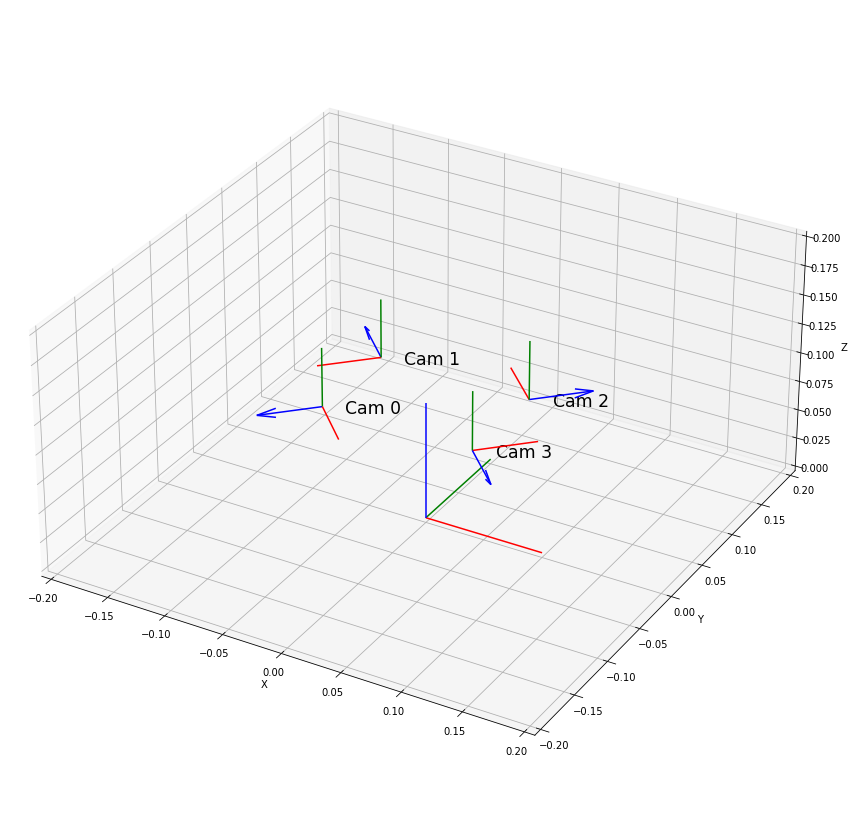

camera0_pose:
  - [ 7.07106781e-01,  8.65956056e-17, -7.07106781e-01, -6.40000000e-02]
  - [-7.07106781e-01,  9.31021595e-33, -7.07106781e-01, -4.30000000e-02]
  - [-6.123234e-17,  1.000000e+00,  6.123234e-17,  1.000000e-01]
  - [0., 0., 0., 1.]
camera1_pose:
  - [-7.07106781e-01,  1.46126675e-32, -7.07106781e-01, -6.40000000e-02]
  - [-7.07106781e-01, -8.65956056e-17,  7.07106781e-01,  4.30000000e-02]
  - [-6.123234e-17,  1.000000e+00,  6.123234e-17,  1.000000e-01]
  - [0., 0., 0., 1.]
camera2_pose:
  - [-7.07106781e-01, -8.65956056e-17,  7.07106781e-01,  6.40000000e-02]
  - [ 7.07106781e-01, -1.99151191e-32,  7.07106781e-01,  4.30000000e-02]
  - [-6.123234e-17,  1.000000e+00,  6.123234e-17,  1.000000e-01]
  - [0., 0., 0., 1.]
camera3_pose:
  - [ 7.07106781e-01, -2.52175706e-32,  7.07106781e-01,  6.40000000e-02]
  - [ 7.07106781e-01,  8.65956056e-17, -7.07106781e-01, -4.30000000e-02]
  - [-6.123234e-17,  1.000000e+00,  6.123234e-17,  1.000000e-01]
  - [0., 0., 0., 1.]


In [12]:
 #Roll 180 Pitch-90 Yaw135
plt.rc('figure', figsize=(15, 15))
DEG2RAD = np.pi / 180.0
Tcam0 = euler_matrix(0, 0, -135*DEG2RAD)@euler_matrix(0, 90*DEG2RAD, 0)@euler_matrix(0, 0, 90*DEG2RAD)
Tcam0[0:3, 3] = np.array([-0.064, -0.043, 0.1])

Tcam1 = euler_matrix(0, 0, -np.pi/2)@Tcam0
Tcam1[0:3, 3] = np.array([-0.064, 0.043, 0.1])

Tcam2 = euler_matrix(0, 0, -np.pi/2)@Tcam1
Tcam2[0:3, 3] = np.array([0.064, 0.043, 0.1])

Tcam3 = euler_matrix(0, 0, -np.pi/2)@Tcam2
Tcam3[0:3, 3] = np.array([0.064, -0.043, 0.1])

poses = [
    Tcam0,
    Tcam1,
    Tcam2,
    Tcam3
]
plot_camera_poses(poses)
for i in range(len(poses)):
    #Print camera pose in yaml format
    print(f"camera{i}_pose:")
    print(f"  - {np.array2string(poses[i][0, :], separator=', ')}")
    print(f"  - {np.array2string(poses[i][1, :], separator=', ')}")
    print(f"  - {np.array2string(poses[i][2, :], separator=', ')}")
    print(f"  - {np.array2string(poses[i][3, :], separator=', ')}")

In [8]:
euler_from_matrix(Tcam0)

(0.7853981633974484, -1.5707963267948966, 0.0)